# **Check GPU**

In [1]:
# Check the GPU model:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-eacb17ba-25e0-2e04-25c3-fb15d78224b1)


In [2]:
!pip install -U -q tf-nightly

# Check TensorFlow version (should be minimum 2.4.0+ but 2.13.0+ is better)
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 105.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.0/441.0 kB 47.6 MB/s eta 0:00:00
TensorFlow version: 2.14.0-dev20230616
Notebook last run (end-to-end): 2023-06-16 22:34:33.995527


# **Helper Functions**

In [3]:
# Get helper functions file
import os

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")

--2023-06-16 22:34:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-16 22:34:34 (67.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# Import series of helper functions for the notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

# **TensorFlow Datasets to Download Data**

In [5]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds

In [6]:
# Get all available datasets in TFDS
datasets_list = tfds.list_builders()

# Set our target dataset and see if it exists
target_dataset = "food101"
print(f"'{target_dataset}' in TensorFlow Datasets: {target_dataset in datasets_list}")

'food101' in TensorFlow Datasets: True


In [7]:
# Load in the data
(train_data, test_data), ds_info = tfds.load(name="food101", # target dataset to get from TFDS
                                             split=["train", "validation"], # what splits of data should we get? note: not all datasets have train, valid, test
                                             shuffle_files=False, # shuffle files on download?
                                             as_supervised=True, # download data in tuple format (sample, label), e.g. (image, label)
                                             with_info=True) # include dataset metadata? if so, tfds.load() returns tuple

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteSNJDD4/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteSNJDD4/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [8]:
print(ds_info)

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_path=PosixGPath('/tmp/tmpb_ug7qcxtfds'),
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_exam

In [9]:
builder = tfds.builder('food101')
info = builder.info

In [10]:
print(info)

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_path='/root/tensorflow_datasets/food101/2.0.0',
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo n

In [11]:
# Features of TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [12]:
# Get class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

# **Exploring the Food101 data from TensorFlow Datasets**

In [13]:
# Take one sample off the training data
train_one_sample = train_data.take(1) # samples are in format (image_tensor, label)

In [14]:
# What does one sample of training data look like?
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [15]:
# Output information about training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (512, 512, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 56
  Class name (str form): huevos_rancheros
        


In [16]:
# What does an image tensor from TFDS's look like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[233, 253, 251],
        [231, 253, 250],
        [228, 254, 251],
        ...,
        [ 85,  82,  89],
        [ 68,  67,  75],
        [ 57,  57,  67]],

       [[232, 254, 252],
        [229, 254, 251],
        [226, 255, 251],
        ...,
        [121, 116, 120],
        [100,  99, 104],
        [ 86,  85,  91]],

       [[228, 254, 253],
        [226, 255, 253],
        [223, 255, 252],
        ...,
        [164, 159, 155],
        [145, 141, 138],
        [128, 127, 125]],

       ...,

       [[ 66, 112, 164],
        [ 67, 113, 163],
        [ 55,  99, 148],
        ...,
        [  5,  14,  23],
        [  9,  18,  27],
        [  8,  17,  26]],

       [[ 76, 123, 177],
        [ 75, 122, 176],
        [ 70, 116, 168],
        ...,
        [  5,  14,  23],
        [  9,  18,  25],
        [  7,  16,  23]],

       [[ 80, 129, 185],
        [ 71, 121, 174],
        [ 74, 121, 175],
        ...,
        [  7,  16,  2

In [17]:
# What are the min and max values?
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

# **Plot an image from TensorFlow Datasets**

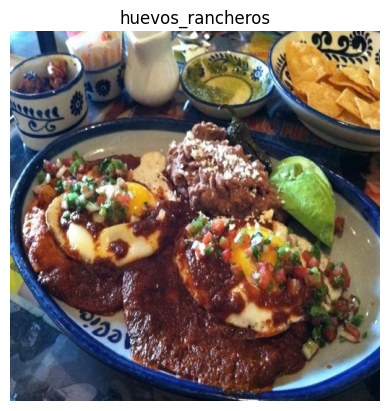

In [18]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()]) # add title to image by indexing on class_names list
plt.axis(False);

# **Create preprocessing functions for our data**

In [19]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
    return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

In [20]:
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[233 253 251]
  [231 253 250]
  [228 254 251]
  ...
  [ 85  82  89]
  [ 68  67  75]
  [ 57  57  67]]

 [[232 254 252]
  [229 254 251]
  [226 255 251]
  ...
  [121 116 120]
  [100  99 104]
  [ 86  85  91]]]...,
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[230.65816 253.64285 251.     ]
  [222.99998 254.97449 252.19388]
  [207.06633 255.      250.36734]
  ...
  [140.66287 129.52519 121.22428]
  [121.14268 115.26515 116.95397]
  [ 83.95363  83.08119  89.63737]]

 [[221.47449 254.37755 253.33163]
  [214.5102  255.      253.92348]
  [198.41327 254.58673 251.96939]
  ...
  [208.66318 195.82143 173.40823]
  [197.03056 190.1071  174.83162]
  [175.54036 171.6169  161.21384]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


Looks like our preprocess_img() function is working as expected.

The input image gets converted from uint8 to float32 and gets reshaped from its current shape to (224, 224, 3).

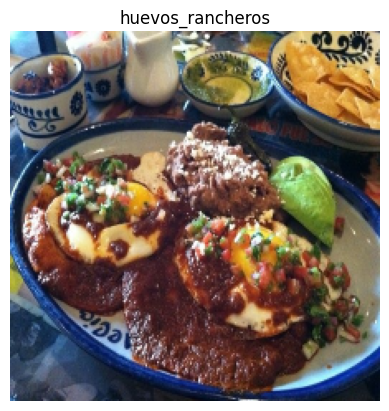

In [21]:
# We can still plot our preprocessed image as long as we divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

# **Batch & prepare datasets**

In [22]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)



In [23]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

# **Create modelling callbacks**

In [24]:
# Create TensorBoard callback
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.ckpt" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved

# **Setup mixed precision training**

In [25]:
# Turn on mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision

In [26]:
mixed_precision.global_policy() # should output "mixed_float16" (if your GPU is compatible with mixed precision)

<Policy "mixed_float16">

# **Build feature extraction model**

Before fine-tuning, it's best practice to train a feature extraction model with custom top layers.

In [27]:
from tensorflow.keras import layers

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = layers.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x) # want one output neuron per class
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


16705208/16705208 [==============================] - 0s 0us/step


In [28]:
# Check out our model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                             

# **Checking layer dtype policies (to check mixed precision)**

In [29]:
# Check the dtype_policy attributes of layers in our model
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # Check the dtype policy of layers

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [30]:
# Check the layers in the base model and see what dtype policy they're using
for layer in model.layers[1].layers[:20]: # only check the first 20 layers to save output space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
rescaling False float32 <Policy "mixed_float16">
normalization False float32 <Policy "mixed_float16">
rescaling_1 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float32 <

# **Fit the feature extraction model**

In [31]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20230616-224713
Epoch 1/3
2368/2368 [==============================] - 216s 83ms/step - loss: 1.7159 - accuracy: 0.5831 - val_loss: 1.1255 - val_accuracy: 0.7055
Epoch 2/3
2368/2368 [==============================] - 203s 84ms/step - loss: 1.2003 - accuracy: 0.6882 - val_loss: 1.0394 - val_accuracy: 0.7190
Epoch 3/3
2368/2368 [==============================] - 196s 81ms/step - loss: 1.0556 - accuracy: 0.7234 - val_loss: 1.0001 - val_accuracy: 0.7267


In [32]:
# Evaluate model (unsaved version) on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 [==============================] - 60s 75ms/step - loss: 1.0080 - accuracy: 0.7255


[1.0079542398452759, 0.7254653573036194]

# **Load and evaluate checkpoint weights**

In [33]:
# 1. Create a function to recreate the original model
def create_model():
  # Create base model
  input_shape = (224, 224, 3)
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
  base_model.trainable = False # freeze base model layers

  # Create Functional model
  inputs = layers.Input(shape=input_shape, name="input_layer")
  # Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
  # x = layers.Rescaling(1./255)(x)
  x = base_model(inputs, training=False) # set base_model to inference mode only
  x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  x = layers.Dense(len(class_names))(x) # want one output neuron per class
  # Separate activation of output layer so we can output float32 activations
  outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
  model = tf.keras.Model(inputs, outputs)

  return model

# 2. Create and compile a new version of the original model (new weights)
created_model = create_model()
created_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# 3. Load the saved weights
created_model.load_weights(checkpoint_path)

# 4. Evaluate the model with loaded weights
results_created_model_with_loaded_weights = created_model.evaluate(test_data)

790/790 [==============================] - 58s 68ms/step - loss: 1.0080 - accuracy: 0.7255


In [34]:
# 5. Loaded checkpoint weights should return very similar results to checkpoint weights prior to saving
import numpy as np
assert np.isclose(results_feature_extract_model, results_created_model_with_loaded_weights).all(), "Loaded weights results are not close to original model."  # check if all elements in array are close

In [35]:
# Check the layers in the base model and see what dtype policy they're using
for layer in created_model.layers[1].layers[:20]: # check only the first 20 layers to save printing space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 False float32 <Policy "float32">
rescaling_2 False float32 <Policy "mixed_float16">
normalization_1 False float32 <Policy "mixed_float16">
rescaling_3 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float

**Skipped saving the model since it does not work with the TensorFlow version 2.14.0**

# **Preparing our model's layers for fine-tuning**

In [36]:
# Are any of the layers in our model frozen?
for layer in created_model.layers:
    layer.trainable = True # set all layers to trainable
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # make sure loaded model is using mixed precision dtype_policy ("mixed_float16")

input_layer True float32 <Policy "float32">
efficientnetb0 True float32 <Policy "mixed_float16">
pooling_layer True float32 <Policy "mixed_float16">
dense_1 True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [37]:
# Check the layers in the base model and see what dtype policy they're using
for layer in created_model.layers[1].layers[:30]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_2 True float32 <Policy "float32">
rescaling_2 True float32 <Policy "mixed_float16">
normalization_1 True float32 <Policy "mixed_float16">
rescaling_3 True float32 <Policy "mixed_float16">
stem_conv_pad True float32 <Policy "mixed_float16">
stem_conv True float32 <Policy "mixed_float16">
stem_bn True float32 <Policy "mixed_float16">
stem_activation True float32 <Policy "mixed_float16">
block1a_dwconv True float32 <Policy "mixed_float16">
block1a_bn True float32 <Policy "mixed_float16">
block1a_activation True float32 <Policy "mixed_float16">
block1a_se_squeeze True float32 <Policy "mixed_float16">
block1a_se_reshape True float32 <Policy "mixed_float16">
block1a_se_reduce True float32 <Policy "mixed_float16">
block1a_se_expand True float32 <Policy "mixed_float16">
block1a_se_excite True float32 <Policy "mixed_float16">
block1a_project_conv True float32 <Policy "mixed_float16">
block1a_project_bn True float32 <Policy "mixed_float16">
block2a_expand_conv True float32 <Policy "mixed_f

In [38]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [39]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

In [40]:
# Compile the model
created_model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                        optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than the default
                        metrics=["accuracy"])

In [41]:
# Start to fine-tune (all layers)
history_101_food_classes_all_data_fine_tune = created_model.fit(train_data,
                                                        epochs=100, # fine-tune for a maximum of 100 epochs
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                                        callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"), # track the model training logs
                                                                   model_checkpoint, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr]) # reduce the learning rate after X epochs of no improvements

Saving TensorBoard log files to: training_logs/efficientb0_101_classes_all_data_fine_tuning/20230616-225952
Epoch 1/100
2368/2368 [==============================] - 469s 174ms/step - loss: 0.8683 - accuracy: 0.7650 - val_loss: 0.7829 - val_accuracy: 0.7741 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - 392s 164ms/step - loss: 0.5297 - accuracy: 0.8549 - val_loss: 0.8124 - val_accuracy: 0.7844 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - ETA: 0s - loss: 0.2841 - accuracy: 0.9198
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 382s 160ms/step - loss: 0.2841 - accuracy: 0.9198 - val_loss: 0.9039 - val_accuracy: 0.7775 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - 381s 160ms/step - loss: 0.0778 - accuracy: 0.9809 - val_loss: 0.9576 - val_accuracy: 0.8032 - lr: 2.0000e-05


**Skipped saving the model since it does not work with the TensorFlow version 2.14.0**

In [42]:
# Save model to Google Drive
created_model.save("/content/Saved_Fine_Tune_Model")

In [43]:
created_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 1280)              0         
 gePooling2D)                                                    
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activatio  (None, 101)               0         
 n)                                                              
                                                           

In [44]:
results_fine_tuned_created_model = created_model.evaluate(test_data)
results_fine_tuned_created_model

790/790 [==============================] - 56s 71ms/step - loss: 0.9932 - accuracy: 0.7975


[0.993241548538208, 0.797544538974762]

# **Evaluating our models predictions**

In [45]:
# !tensorboard dev upload --logdir ./training_logs \
# --name "Saved_Fine_Tune" \
# --description "Training results for fine-tuning EfficientNetB0 with learning rate 0.0001" \
# --one_shot

Done. View your TensorBoard at https://tensorboard.dev/experiment/xiDejXAYR2eUw9J0AlDotQ/

In [46]:
# Check to see if loaded model is a trained model
loaded_loss, loaded_accuracy = created_model.evaluate(test_data)
loaded_loss, loaded_accuracy

790/790 [==============================] - 54s 68ms/step - loss: 0.9932 - accuracy: 0.7975


(0.993241548538208, 0.797544538974762)

In [47]:
# Make predictions with model
pred_probs = created_model.predict(test_data, verbose=1) # set verbosity to see how long it will take

790/790 [==============================] - 58s 70ms/step


In [48]:
# How many predictions are there?
len(pred_probs)

25250

In [49]:
# What's the shape of our predictions?
pred_probs.shape

(25250, 101)

In [50]:
# How do they look?
pred_probs[:10]

array([[4.7646495e-06, 3.3413165e-15, 2.3523138e-11, ..., 2.4614957e-08,
        7.7129400e-11, 1.9862014e-06],
       [2.2094258e-09, 1.6096676e-11, 4.2015770e-08, ..., 1.2988541e-09,
        4.6970626e-07, 5.4766183e-12],
       [1.8075236e-12, 1.2690807e-13, 5.4582488e-14, ..., 5.7201958e-14,
        3.3840059e-11, 6.5839051e-14],
       ...,
       [1.0900772e-11, 9.2987886e-17, 7.4180679e-13, ..., 3.6568017e-15,
        1.2565612e-14, 1.4837071e-13],
       [2.9667146e-16, 1.5066220e-15, 2.7012243e-16, ..., 8.0983472e-14,
        6.7460817e-08, 1.5544472e-15],
       [7.5739147e-03, 1.4873716e-08, 1.6687847e-09, ..., 7.0596649e-03,
        7.3013633e-13, 9.1743809e-01]], dtype=float32)

In [51]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 101
What prediction probability sample 0 looks like:
 [4.76464947e-06 3.34131649e-15 2.35231383e-11 2.31933308e-14
 2.28954788e-09 1.15299111e-12 1.56040369e-13 1.13989859e-10
 5.23294375e-06 4.48271642e-09 9.88871491e-08 1.09557545e-14
 4.69784656e-09 2.28610361e-06 4.59867913e-08 2.04680446e-14
 1.92509242e-06 5.02190346e-07 1.75336184e-17 1.48670812e-10
 1.10815885e-16 1.03632843e-07 1.58926117e-08 5.61077740e-10
 9.21179365e-12 2.65433617e-13 6.91383548e-11 5.13019778e-08
 3.09856557e-10 9.99619722e-01 2.66310119e-04 3.02859553e-06
 6.30460107e-14 2.98706196e-20 8.97135305e-06 5.01591016e-15
 2.93983771e-09 2.82552627e-13 6.37701407e-16 1.18959096e-12
 1.69686043e-14 2.46891740e-14 4.45719337e-08 4.47736620e-17
 5.19693772e-13 1.80845700e-06 1.94195381e-13 8.10746387e-17
 6.88482420e-13 5.55542244e-11 2.63922282e-12 3.80216122e-13
 1.36346572e-14 4.59867913e-08 7.54111530e-18 1.59165528e-11
 1.27700712e-08 1.75810148e-12 4.14831156e-

In [52]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([ 29,  81,  91,  53,  97,  97,  10,  31,   3, 100])

In [53]:
# Note: This might take a minute or so due to unravelling 790 batches
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[29, 81, 91, 53, 97, 97, 10, 31, 3, 100]

In [54]:
# How many labels are there? (should be the same as how many prediction probabilities we have)
len(y_labels)

25250

In [55]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.7975445544554456

In [56]:
#from helper_functions import make_confusion_matrix

In [57]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [58]:
# Get the class names
#class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [59]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.69      0.52      0.59       250
           1       0.88      0.67      0.76       250
           2       0.83      0.85      0.84       250
           3       0.87      0.80      0.83       250
           4       0.72      0.74      0.73       250
           5       0.72      0.65      0.69       250
           6       0.84      0.84      0.84       250
           7       0.85      0.92      0.89       250
           8       0.66      0.66      0.66       250
           9       0.81      0.67      0.73       250
          10       0.82      0.69      0.75       250
          11       0.82      0.86      0.84       250
          12       0.85      0.89      0.87       250
          13       0.75      0.80      0.77       250
          14       0.78      0.78      0.78       250
          15       0.69      0.65      0.67       250
          16       0.62      0.73      0.67       250
          17       0.84    

In [61]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.6914893617021277,
  'recall': 0.52,
  'f1-score': 0.5936073059360731,
  'support': 250},
 '1': {'precision': 0.8795811518324608,
  'recall': 0.672,
  'f1-score': 0.7619047619047619,
  'support': 250},
 '2': {'precision': 0.83203125,
  'recall': 0.852,
  'f1-score': 0.841897233201581,
  'support': 250},
 '3': {'precision': 0.8728070175438597,
  'recall': 0.796,
  'f1-score': 0.8326359832635983,
  'support': 250},
 '4': {'precision': 0.7215686274509804,
  'recall': 0.736,
  'f1-score': 0.7287128712871288,
  'support': 250},
 '5': {'precision': 0.7244444444444444,
  'recall': 0.652,
  'f1-score': 0.6863157894736842,
  'support': 250},
 '6': {'precision': 0.836, 'recall': 0.836, 'f1-score': 0.836, 'support': 250},
 '7': {'precision': 0.8523985239852399,
  'recall': 0.924,
  'f1-score': 0.8867562380038387,
  'support': 250},
 '8': {'precision': 0.6626506024096386,
  'recall': 0.66,
  'f1-score': 0.6613226452905812,
  'support': 250},
 '9': {'precision': 0.8067632850241

In [62]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.5936073059360731,
 'baby_back_ribs': 0.7619047619047619,
 'baklava': 0.841897233201581,
 'beef_carpaccio': 0.8326359832635983,
 'beef_tartare': 0.7287128712871288,
 'beet_salad': 0.6863157894736842,
 'beignets': 0.836,
 'bibimbap': 0.8867562380038387,
 'bread_pudding': 0.6613226452905812,
 'breakfast_burrito': 0.7308533916849016,
 'bruschetta': 0.7478260869565216,
 'caesar_salad': 0.8382066276803117,
 'cannoli': 0.8705882352941177,
 'caprese_salad': 0.7736943907156673,
 'carrot_cake': 0.7808764940239045,
 'ceviche': 0.668041237113402,
 'cheesecake': 0.6691042047531992,
 'cheese_plate': 0.8458498023715415,
 'chicken_curry': 0.7217391304347827,
 'chicken_quesadilla': 0.8050314465408804,
 'chicken_wings': 0.8676171079429735,
 'chocolate_cake': 0.7004048582995951,
 'chocolate_mousse': 0.6081632653061225,
 'churros': 0.8615384615384615,
 'clam_chowder': 0.8594059405940594,
 'club_sandwich': 0.8519269776876267,
 'crab_cakes': 0.6897880539499037,
 'creme_brulee': 0.85714285714

In [63]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores[:10]

class_name  f1-score
33              edamame  0.992000
63             macarons  0.944444
91  spaghetti_carbonara  0.928854
64            miso_soup  0.925553
75                  pho  0.920696
54    hot_and_sour_soup  0.918699
88        seaweed_salad  0.911591
90  spaghetti_bolognese  0.908722
45        frozen_yogurt  0.903475
40         french_fries  0.895874

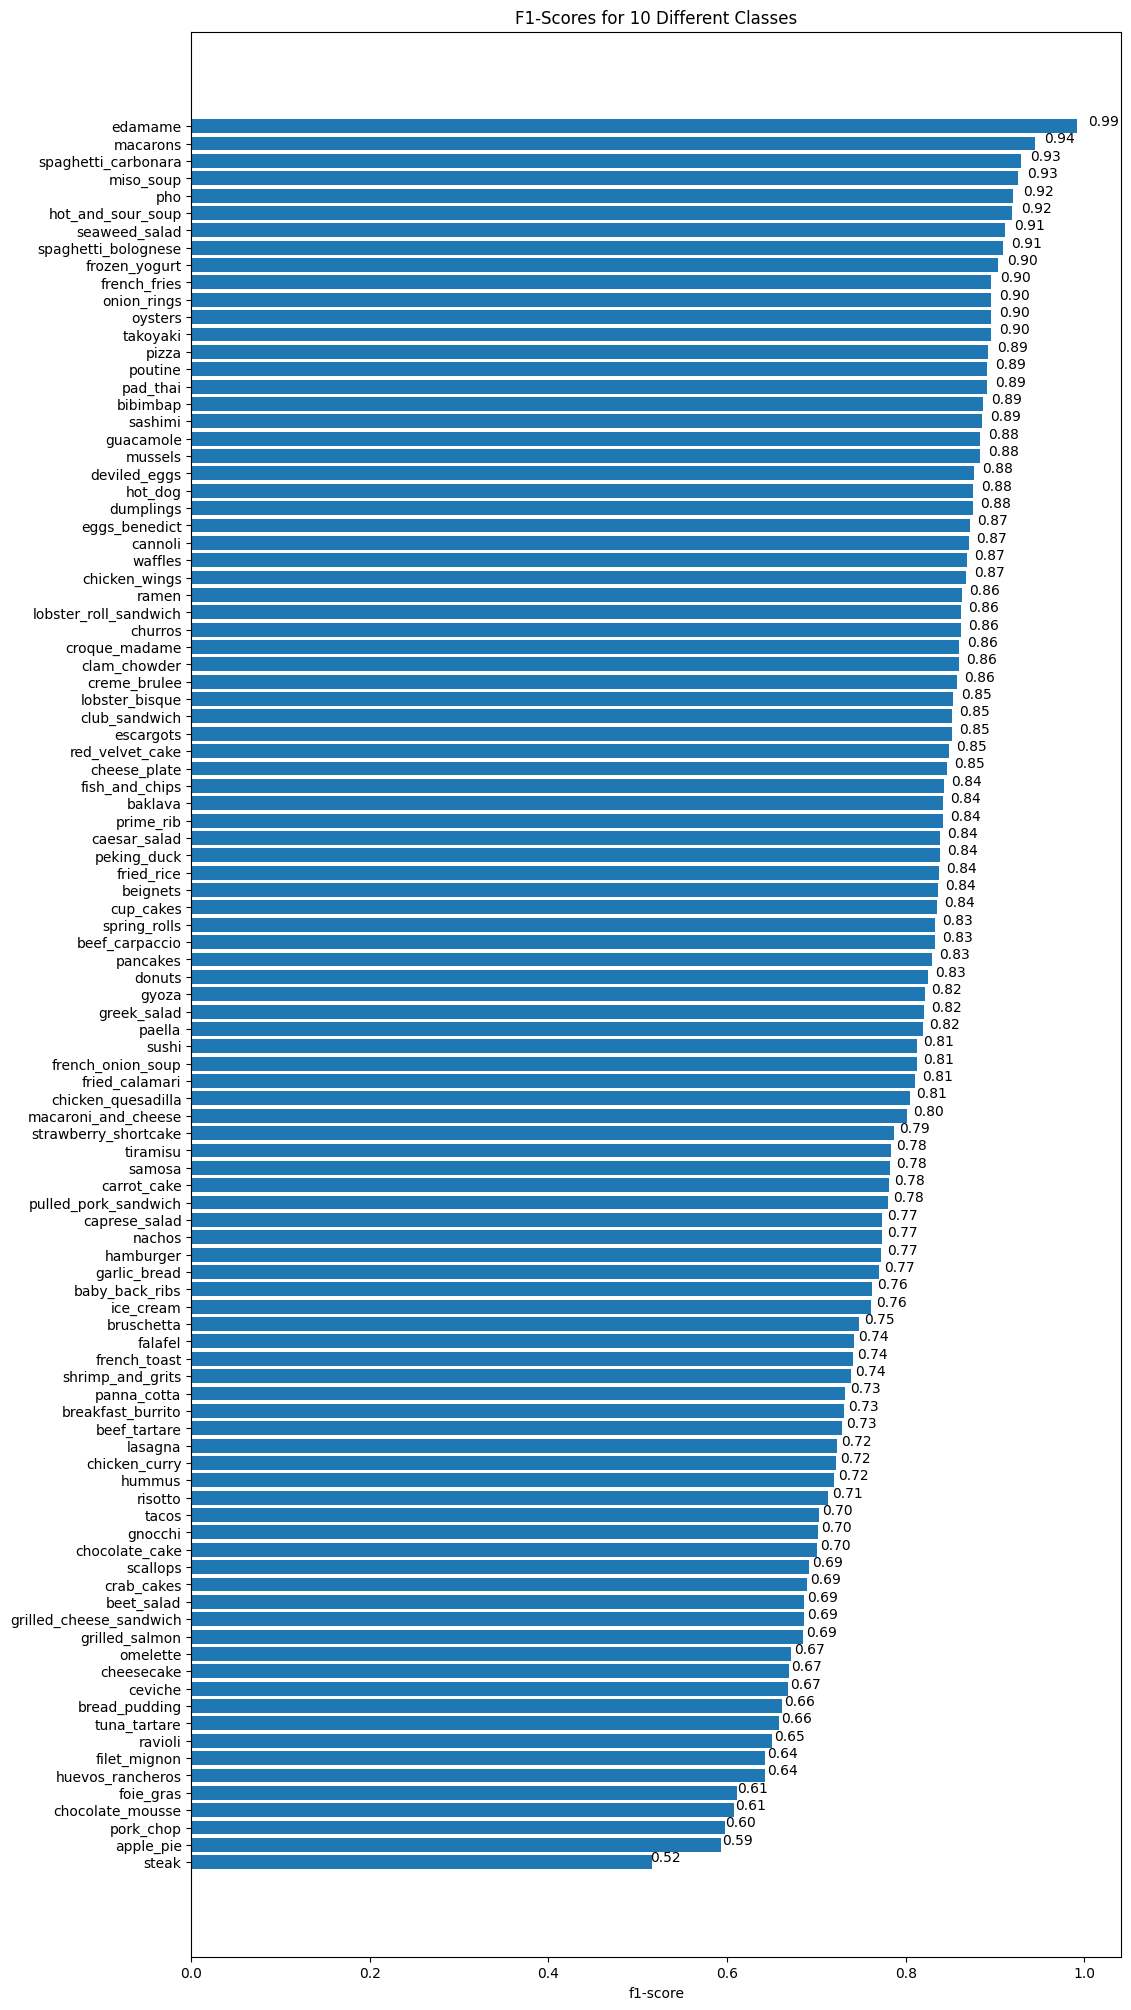

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

# **Visualizing predictions on test images**

In [65]:
!wget https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2023-06-16 23:33:46--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  24.7MB/s    in 3m 25s  

2023-06-16 23:37:12 (23.2 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



NOTE: Purpose of downloading food-101 data here is to check whether train, test/validation data are stored in different folders or not?

If yes, use the following train_dir and test_dir to continue on visualizing predictions.

In [66]:
!gunzip food-101.tar.gz

In [67]:
!tar -xvf food-101.tar

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/

In [98]:
# Download data from Google Storage (already preformatted)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2023-06-16 23:56:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 209.85.234.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  27.4MB/s    in 47s     

2023-06-16 23:57:00 (32.8 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [100]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir
unzip_data("101_food_classes_10_percent.zip")

In [133]:
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

In [134]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 44ms/step


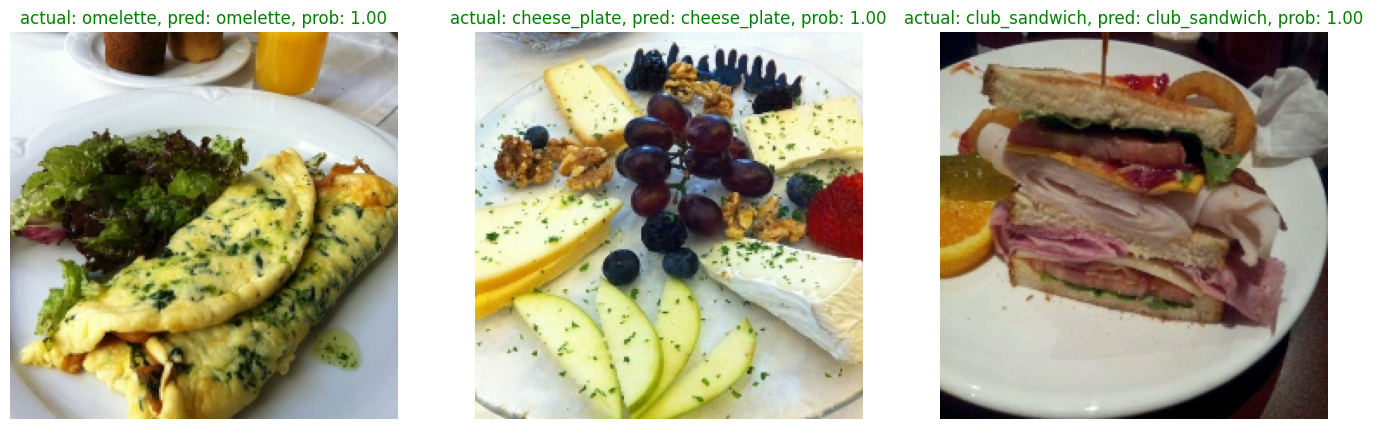

In [135]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = created_model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

# **Finding the most wrong predictions**

In [136]:
# Get the filenames of all of our test data
filepaths = []
for filepath in test_data.list_files("101_food_classes_10_percent/test/*/*.jpg",
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [137]:
# Create a dataframe out of current prediction data for analysis
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...      29      29   
1  b'101_food_classes_10_percent/test/apple_pie/1...      81      81   
2  b'101_food_classes_10_percent/test/apple_pie/1...      91      91   
3  b'101_food_classes_10_percent/test/apple_pie/1...      53      53   
4  b'101_food_classes_10_percent/test/apple_pie/1...      97      97   

   pred_conf     y_true_classname     y_pred_classname  
0   0.999620            cup_cakes            cup_cakes  
1   0.997205                ramen                ramen  
2   0.999999  spaghetti_carbonara  spaghetti_carbonara  
3   0.999686            hamburger            hamburger  
4   0.999995             takoyaki             takoyaki

In [138]:
# Check the predictions?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...      29      29   
1  b'101_food_classes_10_percent/test/apple_pie/1...      81      81   
2  b'101_food_classes_10_percent/test/apple_pie/1...      91      91   
3  b'101_food_classes_10_percent/test/apple_pie/1...      53      53   
4  b'101_food_classes_10_percent/test/apple_pie/1...      97      97   

   pred_conf     y_true_classname     y_pred_classname  pred_correct  
0   0.999620            cup_cakes            cup_cakes          True  
1   0.997205                ramen                ramen          True  
2   0.999999  spaghetti_carbonara  spaghetti_carbonara          True  
3   0.999686            hamburger            hamburger          True  
4   0.999995             takoyaki             takoyaki          True

In [140]:
# Get the top 100 wrong examples
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

img_path  y_true  y_pred  \
15437  b'101_food_classes_10_percent/test/lobster_rol...      56      66   
9735   b'101_food_classes_10_percent/test/fish_and_ch...      87      30   
13884  b'101_food_classes_10_percent/test/hot_dog/289...      46      10   
22358  b'101_food_classes_10_percent/test/shrimp_and_...      34      86   
16129  b'101_food_classes_10_percent/test/miso_soup/2...      65      69   
900    b'101_food_classes_10_percent/test/beef_carpac...      14      29   
4154   b'101_food_classes_10_percent/test/cheese_plat...      11      43   
217    b'101_food_classes_10_percent/test/apple_pie/4...      44      71   
6421   b'101_food_classes_10_percent/test/club_sandwi...      17      16   
17440  b'101_food_classes_10_percent/test/oysters/386...      23      68   
3182   b'101_food_classes_10_percent/test/cannoli/362...      21      83   
18371  b'101_food_classes_10_percent/test/panna_cotta...      43      31   
6614   b'101_food_classes_10_percent/test/crab_cakes/...      93       1   
15071  b'101_food_classes_10_percent/test/lobster_bis...      85      92   
14569  b'101_food_classes_10_percent/test/ice_cream/2...       2      12   
13715  b'101_food_classes_10_percent/test/hot_and_sou...      42       6   
20067  b'101_food_classes_10_percent/test/pulled_pork...      44       2   
2379   b'101_food_classes_10_percent/test/breakfast_b...      31       6   
21838  b'101_food_classes_10_percent/test/scallops/22...       8      41   
6717   b'101_food_classes_10_percent/test/crab_cakes/...      31      29   

       pred_conf  y_true_classname   y_pred_classname  pred_correct  
15437   1.000000  huevos_rancheros             nachos         False  
9735    1.000000          scallops       deviled_eggs         False  
13884   1.000000      garlic_bread         bruschetta         False  
22358   1.000000     eggs_benedict            sashimi         False  
16129   1.000000           mussels            oysters         False  
900     1.000000       carrot_cake          cup_cakes         False  
4154    1.000000      caesar_salad     fried_calamari         False  
217     0.999999        fried_rice             paella         False  
6421    0.999999      cheese_plate         cheesecake         False  
17440   0.999998           churros        onion_rings         False  
3182    0.999998    chocolate_cake    red_velvet_cake         False  
18371   0.999997    fried_calamari             donuts         False  
6614    0.999997             steak     baby_back_ribs         False  
15071   0.999996            samosa       spring_rolls         False  
14569   0.999996           baklava            cannoli         False  
13715   0.999996      french_toast           beignets         False  
20067   0.999995        fried_rice            baklava         False  
2379    0.999994            donuts           beignets         False  
21838   0.999994     bread_pudding  french_onion_soup         False  
6717    0.999992            donuts          cup_cakes         False

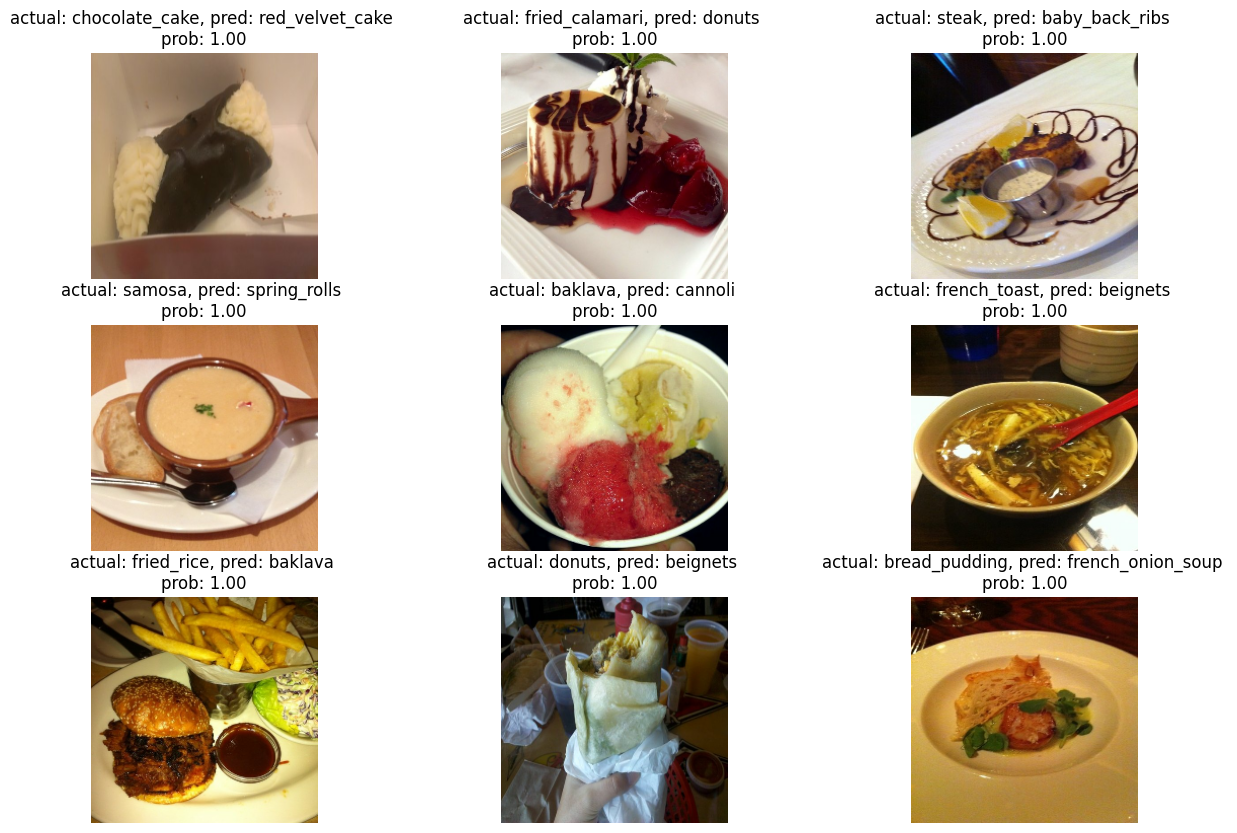

In [141]:
# Visualize some of the most wrong examples
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)

TODOs:
1. Use the same evaluation techniques on the large-scale Food Vision model as you did in the previous notebook (Transfer Learning Part 3: Scaling up). More specifically, it would be good to see:

+ A confusion matrix between all of the model's predictions and true labels.

+ A graph showing the f1-scores of each class.

+ A visualization of the model making predictions on various images and comparing the predictions to the ground truth.
For example, plot a sample image from the test dataset and have the title of the plot show the prediction, the prediction probability and the ground truth label.

2. Take 3 of your own photos of food and use the Food Vision model to make predictions on them. How does it go? Share your images/predictions with the other students.
3. Retrain the model (feature extraction and fine-tuning) we trained in this notebook, except this time use EfficientNetB4 as the base model instead of EfficientNetB0. Do you notice an improvement in performance? Does it take longer to train? Are there any tradeoffs to consider?